In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

### 1. Згенерувати випадковий процес за різницевим рівнянням
### x(n)= θ(n)+x(n-1)-0.5*x(n-2),
### де θ(n) – нормальний білий шум з нулевим математичним очікуванням и одиничною дисперсією. Початковий стан x(-1)=x(-2)=0. Для аналізу виділити інтервал тривалістю 4096 відліків, вільний від перехідного процесу.

In [57]:
# constants, functions and utils
#NUM_OF_PERIODS_FOR_ANALOGUE = 11
#NUM_OF_PERIODS_FOR_SAMPLING = 5
#NUM_OF_DOTS_PER_PERIOD_RESTORED = 5
F_S = 2*np.pi
F_CONST = F_S/4


def function(t,f):
    return np.cos(t*np.pi*2*f) #+ np.cos(t*np.pi*2*f/2) + np.cos(t*np.pi*2*f/3)

FUNCTION =np.vectorize(function)

In [58]:
def generate_signal(N):
    theta = np.random.normal(loc=0,scale=1,size=(N,))
    X_n = np.zeros_like(theta)
    for i in range(N):
        X_n[i] = theta[i] +X_n[i-1] - 0.5*X_n[i-2]

    return theta,X_n

In [59]:
theta, X_n = generate_signal(4096)

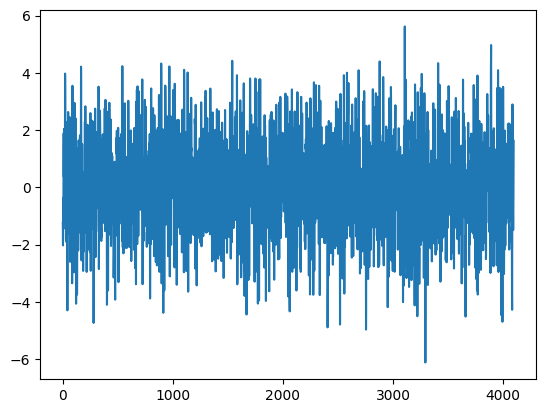

In [60]:
plt.plot(X_n)

### 2. Оцінити СГП випадкового процесу при M=128, 512, 1024 и D=M, M/2 без використання вікна. Порівняти отримані оцінки з очікуваною СГП і зробити висновки.

### 3. Повторити п. 2 з використанням вікон Хемінга, Кайзера и Блекмана.

In [61]:
def create_sub_sequences(X_main,D,M):
    Xrs = []
    N = len(X_main)
    r = 1
    while M+D*(r-1)<=N:
        Xrs.append(X_n[D*(r-1):D*(r-1)+M])
        r+=1
    return Xrs

Xrs = create_sub_sequences(X_n,128,128)

In [62]:
len(Xrs)

32

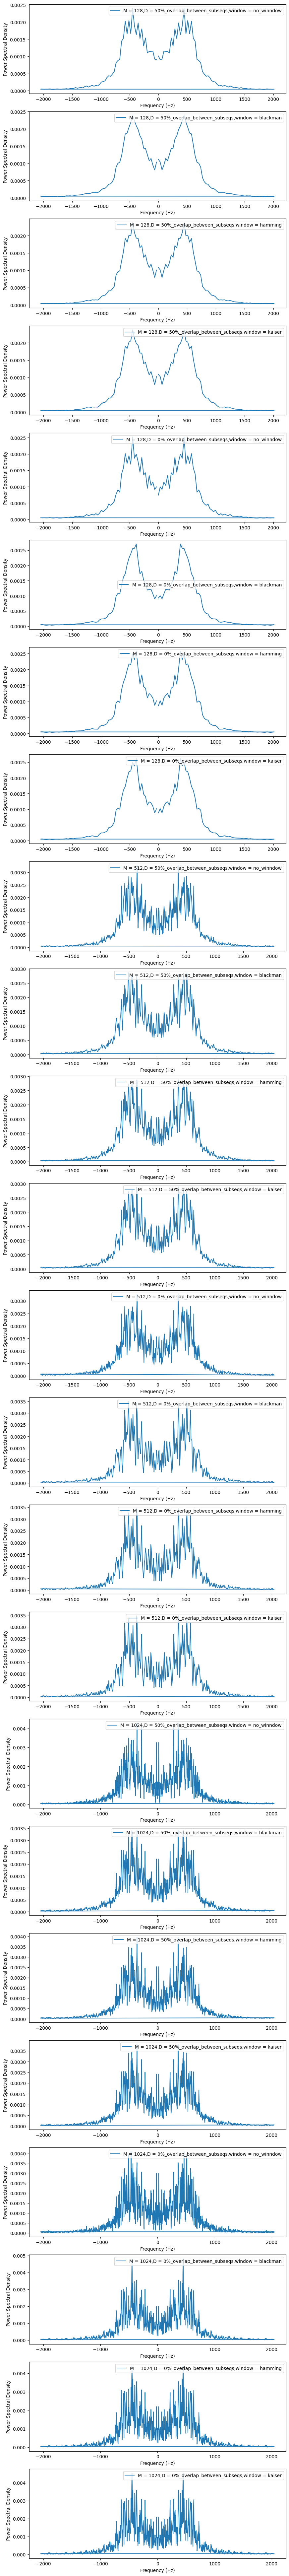

In [69]:
from scipy.signal.windows import blackman,hamming,kaiser

N = 4096
Ms = [128,512,1024]
Ds = {'50%_overlap_between_subseqs':lambda M:M//2,#50% overlap between subsequences
      '0%_overlap_between_subseqs':lambda M:M} #0% overlap betweeen subsequences
window_functions = {'no_winndow': lambda seq,M:(np.ones(shape=(M)),seq),
                    'blackman':lambda seq,M:(blackman(M),blackman(M)*seq),
                    'hamming':lambda seq,M:(hamming(M),hamming(M)*seq),
                    'kaiser':lambda seq,M:(kaiser(M,beta=6),kaiser(M,beta=6)*seq)
                    }
theta, X_n = generate_signal(N)
fig,ax = plt.subplots(24,figsize=(10,100))
ax_i = 0
for M in Ms:
    for d_notation,d_func in Ds.items():
        for window_name,window_func in window_functions.items():
            D = d_func(M=M)
            Xrs = create_sub_sequences(X_main=X_n,D=D,M=M)
            periodogram_cumulative_sum = np.zeros(shape=(M,))
            K = len(Xrs)
            for Xr in Xrs:
                window,Xr_window_modified = window_func(seq=Xr,M=M)
                window_energy = np.sum(window**2)
                periodogram = np.abs(fft(Xr_window_modified))**2/window_energy
                periodogram_cumulative_sum+=periodogram
            PSD_final = periodogram_cumulative_sum/(K*N)
            xf = fftfreq(M,1/N)
            cur_ax = ax[ax_i]
            cur_ax.plot(xf,PSD_final, label=f'M = {M},D = {d_notation},window = {window_name}')
            cur_ax.set_xlabel('Frequency (Hz)')
            cur_ax.set_ylabel('Power Spectral Density')
            #cur_ax.title('Power Spectral Density with Varying Window Sizes')
            cur_ax.legend()
            ax_i +=1



### 4. Додати до процесу, який аналізується, періодичну складову виду 0.1*sin(2π*0.15*n) и повторити п 2. Оцінити частоту періодичної складової по оцінці СГП.

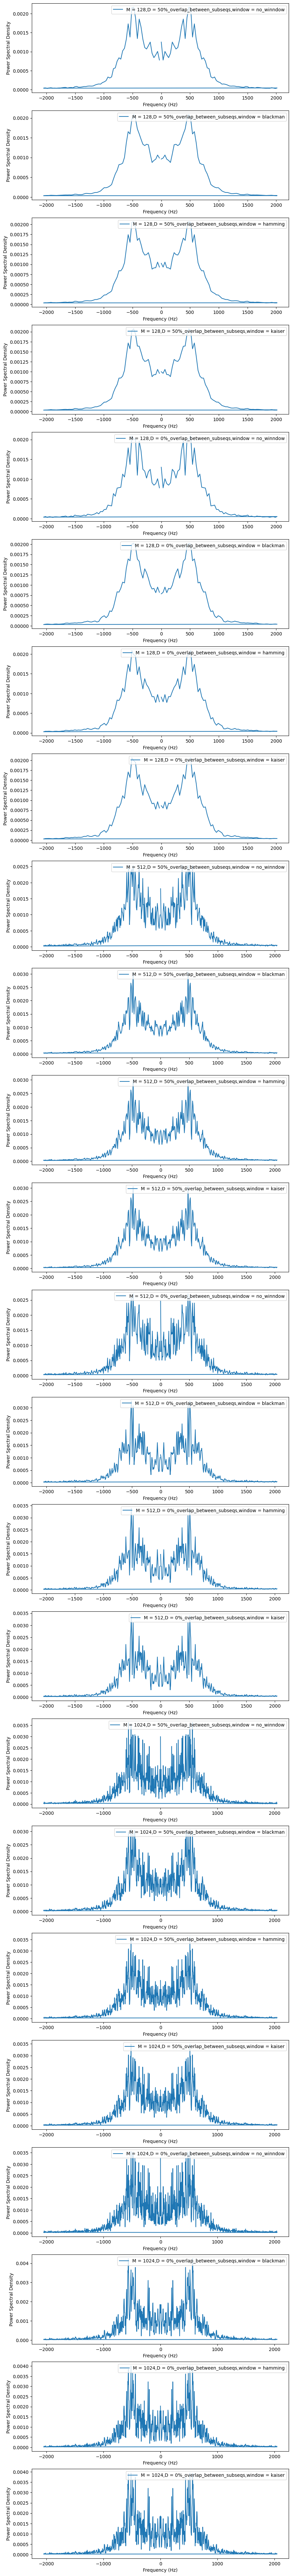

In [73]:
from scipy.signal.windows import blackman,hamming,kaiser

N = 4096
Ms = [128,512,1024]
Ds = {'50%_overlap_between_subseqs':lambda M:M//2,#50% overlap between subsequences
      '0%_overlap_between_subseqs':lambda M:M} #0% overlap betweeen subsequences
window_functions = {'no_winndow': lambda seq,M:(np.ones(shape=(M)),seq),
                    'blackman':lambda seq,M:(blackman(M),blackman(M)*seq),
                    'hamming':lambda seq,M:(hamming(M),hamming(M)*seq),
                    'kaiser':lambda seq,M:(kaiser(M,beta=6),kaiser(M,beta=6)*seq)
                    }
theta, X_n = generate_signal(N)
t = np.linspace(0,1,N)
X_n+=0.1*np.sin(2*np.pi*0.15*t)
fig,ax = plt.subplots(24,figsize=(10,100))
ax_i = 0
for M in Ms:
    for d_notation,d_func in Ds.items():
        for window_name,window_func in window_functions.items():
            D = d_func(M=M)
            Xrs = create_sub_sequences(X_main=X_n,D=D,M=M)
            periodogram_cumulative_sum = np.zeros(shape=(M,))
            K = len(Xrs)
            for Xr in Xrs:
                window,Xr_window_modified = window_func(seq=Xr,M=M)
                window_energy = np.sum(window**2)
                periodogram = np.abs(fft(Xr_window_modified))**2/window_energy
                periodogram_cumulative_sum+=periodogram
            PSD_final = periodogram_cumulative_sum/(K*N)
            xf = fftfreq(M,1/N)
            cur_ax = ax[ax_i]
            cur_ax.plot(xf,PSD_final, label=f'M = {M},D = {d_notation},window = {window_name}')
            cur_ax.set_xlabel('Frequency (Hz)')
            cur_ax.set_ylabel('Power Spectral Density')
            #cur_ax.title('Power Spectral Density with Varying Window Sizes')
            cur_ax.legend()
            ax_i +=1


 

 

Optimal window size: 128


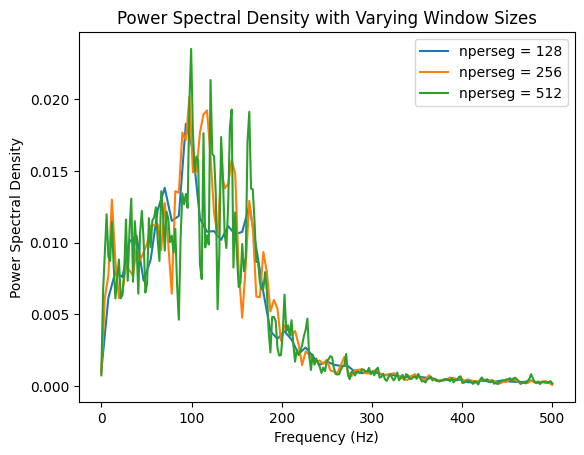

In [64]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate a test signal
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
f1 = 10  # Signal frequency (Hz)
f2 = 50
x = 1.5 * np.sin(2*np.pi*f1*t) + 0.5 * np.sin(2*np.pi*f2*t)

# Set up parameters for power spectral density estimation
nperseg_values = [128,256,512]  # Varying window sizes
noverlap = 0  # No overlapping windows
window = 'hamming'  # Use Hann window function
scaling = 'density'  # Scale by signal power (default)

# Compute power spectral density for each window size
psd_values = []
for i, nperseg in enumerate(nperseg_values):
    f, psd = signal.welch(X_n, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, scaling=scaling)
    plt.plot(f, psd, label=f'nperseg = {nperseg}')
    psd_values.append(psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density with Varying Window Sizes')
plt.legend()
# Plot power spectral density for each window size
# plt.figure()
# for i, nperseg in enumerate(nperseg_values):
#     plt.plot(f, psd_values[i], label=f'nperseg = {nperseg}')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power Spectral Density')
# plt.title('Power Spectral Density with Varying Window Sizes')
# plt.legend()

# Find optimal window size with least noise
noise_values = [np.mean(psd[150:200]) for psd in psd_values]  # Compute noise level as mean PSD between 150 and 200 Hz
optimal_nperseg = nperseg_values[np.argmin(noise_values)]
print(f'Optimal window size: {optimal_nperseg}')


In [18]:
len(psd_values)

5

In [23]:
len(psd_values[4])

257